In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# load breast cancer
data = load_breast_cancer()
indices = np.random.permutation(len(data.target))
data.data, data.target = data.data[indices], data.target[indices]

In [3]:
# define Dataset
class Dataset:
    def __init__(self, data):
      self.x, self.y = data
    def __getitem__(self, item): return self.x[item], self.y[item]
    def __len__(self): return len(self.y)
# Dataset

def dataset_visualize(dataset: Dataset):
  for x, y in dataset: print(f"{'-' * 16}\nx: {x}\ny: {y}")
# dataset_visualize

# init Datasets
trainset = Dataset((data.data[:100, 0:2], data.target[:100]))
testset = Dataset((data.data[100:, 0:2], data.target[100:]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


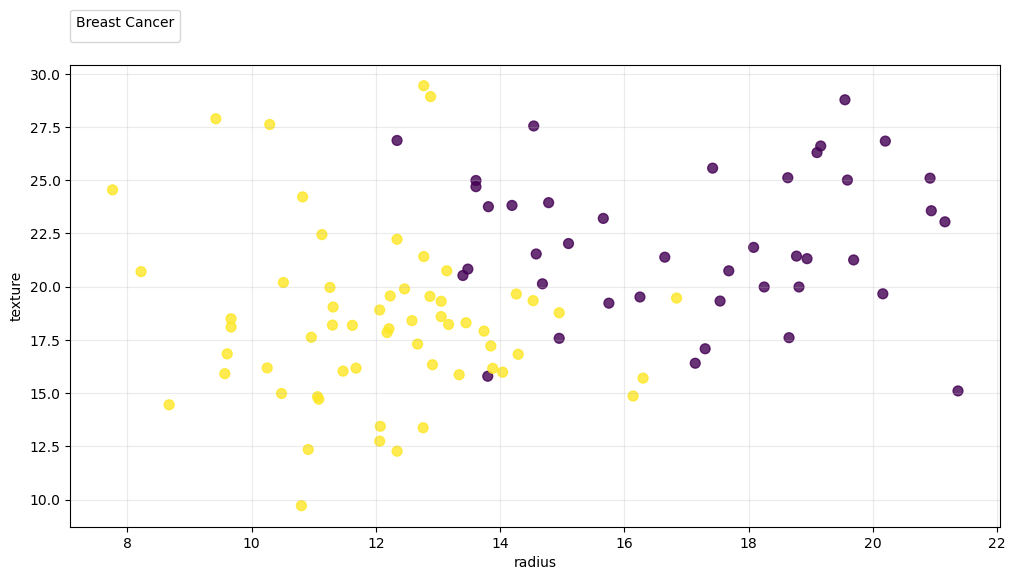

In [4]:
# plot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.set_xlabel('radius')
ax1.set_ylabel('texture')
ax1.grid(True, alpha=0.25)
ax1.scatter(x=trainset.x[:, 0], y=trainset.x[:, 1], s=50, alpha=0.8, c=trainset.y)
ax1.legend(title="Breast Cancer", fontsize=10, loc=(0,1.05))

In [5]:
def sigmoid(x, e=2.7182): return 1 / (1 + e ** (-x))
def relu(x): return np.array(max(0, x))

In [6]:
def gdr(x, y, weight, act_func, lr):
    indications = act_func(np.dot(x, weight))
    weight -= (lr / x.shape[0]) * np.dot(x.T, (indications - y))
# gdr

class LogisticRegression:
    def __init__(self, n_inpt): self.weight = np.random.rand(n_inpt)
    def train(self, dataset, iters: int, lr=0.01):
        for _ in range(iters):
            for x, y in dataset:
                gdr(x, y, self.weight, act_func=relu, lr=lr)
    # train
    
    def __call__(self, x): return 0 if np.dot(x, self.weight) >= 0.5 else 1
    
    def loss(self, xy):
        x, y = xy.data[:100, 0:2], xy.target[:100]
        probability = np.dot(x, self.weight)
        loss = np.mean(np.exp(1 - probability) * y) + np.sum(np.exp(probability) * (1 - y))
        print(f"cost: {loss:.3f}")
    # loss
# LogisticRegression

In [7]:
model = LogisticRegression(len(trainset.x[0]))
model.loss(data)
model.train(trainset, iters=1000, lr=0.0001)

cost: 87282.391


In [16]:
# init a testset
index = random.randrange(0, 100)
test_x, test_y = testset[index]

max_x0, min_x0 = max(testset.x[:, 0]), min(testset.x[:, 0])
max_x1, min_x1 = max(testset.x[:, 1]), min(testset.x[:, 1])
contourf_x0 = np.arange(min_x0, max_x0, 0.1)
contourf_x1 = np.arange(min_x1, max_x1, 0.1)[0:len(contourf_x0)]
contourf_h = contourf_x0 * contourf_x1
print(contourf_h)

ax1.contourf(h, )

pred = model(test_x)
ax1.scatter(x=trainset.x[:, 0], y=trainset.x[:, 1], s=50, alpha=0.8, c=trainset.y)
ax1.scatter(x=test_x[0], y=test_x[1], s=50, alpha=1, c="r")
ax1.legend(title=f"pred: {pred} test_y: {test_y}", fontsize=10, loc=(0,1.05))

fig

[ 72.46278  74.20888  75.97498  77.76108  79.56718  81.39328  83.23938
  85.10548  86.99158  88.89768  90.82378  92.76988  94.73598  96.72208
  98.72818 100.75428 102.80038 104.86648 106.95258 109.05868 111.18478
 113.33088 115.49698 117.68308 119.88918 122.11528 124.36138 126.62748
 128.91358 131.21968 133.54578 135.89188 138.25798 140.64408 143.05018
 145.47628 147.92238 150.38848 152.87458 155.38068 157.90678 160.45288
 163.01898 165.60508 168.21118 170.83728 173.48338 176.14948 178.83558
 181.54168 184.26778 187.01388 189.77998 192.56608 195.37218 198.19828
 201.04438 203.91048 206.79658 209.70268 212.62878 215.57488 218.54098
 221.52708 224.53318 227.55928 230.60538 233.67148 236.75758 239.86368
 242.98978 246.13588 249.30198 252.48808 255.69418 258.92028 262.16638
 265.43248 268.71858 272.02468 275.35078 278.69688 282.06298 285.44908
 288.85518 292.28128 295.72738 299.19348 302.67958 306.18568 309.71178
 313.25788 316.82398 320.41008 324.01618 327.64228 331.28838 334.95448
 338.6

NameError: name 'h' is not defined

In [9]:
model.loss(data)

cost: 69.933
